In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 11 13:35:38 2020

@author: Alok Kumar Sahu
@email : alok.kr.sahu@outlook.com
@Linkedin : www.linkedin.com/in/alokkrsahu

"""

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error,max_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:

path = os.path.join("/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv")
imdb = pd.read_csv(path)

In [4]:
print('Rows     :',imdb.shape[0])
print('Columns  :',imdb.shape[1])
print('\nFeatures :\n     :',imdb.columns.tolist())
print('\nMissing values    :',imdb.isnull().values.sum())
print('\nUnique values : \n',imdb.nunique())

Rows     : 5043
Columns  : 28

Features :
     : ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

Missing values    : 2698

Unique values : 
 color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

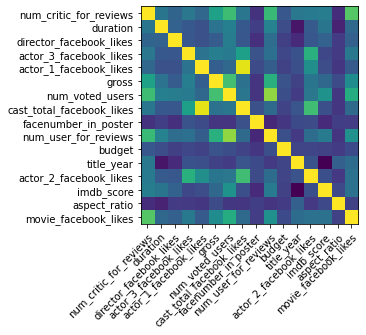

In [5]:
corr = imdb.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

In [6]:
imdb = imdb.drop(['color','director_name','actor_2_name','genres','language','country','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','content_rating','aspect_ratio'], axis = 1)

In [7]:
# Filling missing values
imdb['duration'].fillna(imdb['duration'].mean(), inplace=True)
imdb['num_critic_for_reviews'].fillna(imdb['num_critic_for_reviews'].mean(), inplace=True)
imdb['director_facebook_likes'].fillna(imdb['director_facebook_likes'].mean(), inplace=True)
imdb['actor_3_facebook_likes'].fillna(imdb['actor_3_facebook_likes'].mean(), inplace=True)
imdb['actor_1_facebook_likes'].fillna(imdb['actor_1_facebook_likes'].mean(), inplace=True)
imdb['gross'].fillna(imdb['gross'].mean(), inplace=True)
imdb['num_voted_users'].fillna(imdb['num_voted_users'].mean(), inplace=True)
imdb['cast_total_facebook_likes'].fillna(imdb['cast_total_facebook_likes'].mean(), inplace=True)
imdb['facenumber_in_poster'].fillna(imdb['facenumber_in_poster'].mean(), inplace=True)
imdb['num_user_for_reviews'].fillna(imdb['num_user_for_reviews'].mean(), inplace=True)
imdb['budget'].fillna(imdb['budget'].mean(), inplace=True)
imdb['title_year'].fillna(imdb['title_year'].mean(), inplace=True)
imdb['actor_2_facebook_likes'].fillna(imdb['actor_2_facebook_likes'].mean(), inplace=True)
imdb['imdb_score'].fillna(imdb['imdb_score'].mean(), inplace=True)
imdb['movie_facebook_likes'].fillna(imdb['movie_facebook_likes'].mean(), inplace=True)

In [8]:
train,test = train_test_split(imdb,test_size=0.25)
y_train = train['imdb_score']
y_test = test['imdb_score']
train = train.drop(['imdb_score'], axis = 1)
test = test.drop(['imdb_score'], axis = 1)

In [9]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 15)
rf.fit(train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=15)

In [10]:
predictions = rf.predict(test)

In [11]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.57 degrees.


In [12]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.67 %.
